In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [4]:
from linetimer import CodeTimer

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt


def load_esdf_with_distance(file_path):
    """
    Load an ESDF .ply file and extract points (x, y, z) and intensity (distance).
    """
    with CodeTimer("load_esdf/read_lines"):
        with open(file_path, "r") as f:
            lines = f.readlines()

    with CodeTimer("load_esdf/parse_header"):
        header_ended = False
        data_start_idx = 0
        for i, line in enumerate(lines):
            if "end_header" in line:
                header_ended = True
                data_start_idx = i + 1
                break

        if not header_ended:
            raise ValueError("The input file does not appear to be a valid .ply file.")

    with CodeTimer("load_esdf/loadtxt"):
        # Load the point data (x, y, z, intensity)
        data = np.loadtxt(lines[data_start_idx:], dtype=float)
        if data.shape[1] != 4:
            raise ValueError("The input .ply file must have 4 columns: x, y, z, intensity.")

        points = data[:, :3]
        distances= data[:, 3]
        return points, distances 


In [6]:
ply_files = ["eval_results_office0/violations_baseline.ply",
             "eval_results_office0/violations_heuristic.ply",
             "eval_results_office0/violations_certified.ply"]

In [7]:
distances = []
for file_name in ply_files:
    _, intensities = load_esdf_with_distance(file_name)
    distances.append(intensities)


Code block 'load_esdf/read_lines' took: 61.63759 ms
Code block 'load_esdf/parse_header' took: 0.00531 ms
Code block 'load_esdf/loadtxt' took: 411.66120 ms
Code block 'load_esdf/read_lines' took: 56.72145 ms
Code block 'load_esdf/parse_header' took: 0.00458 ms
Code block 'load_esdf/loadtxt' took: 415.00024 ms
Code block 'load_esdf/read_lines' took: 55.70898 ms
Code block 'load_esdf/parse_header' took: 0.00390 ms
Code block 'load_esdf/loadtxt' took: 432.83801 ms


In [22]:
distances = np.array(distances).T

(array([ 50855., 172183., 107036.,  96457.,  43901.,  23181.,   9108.,
          2766.,   1014.,    379.]),
 array([-0.1      , -0.0295682,  0.0408636,  0.1112954,  0.1817272,
         0.252159 ,  0.3225908,  0.3930226,  0.4634544,  0.5338862,
         0.604318 ]),
 <BarContainer object of 10 artists>)

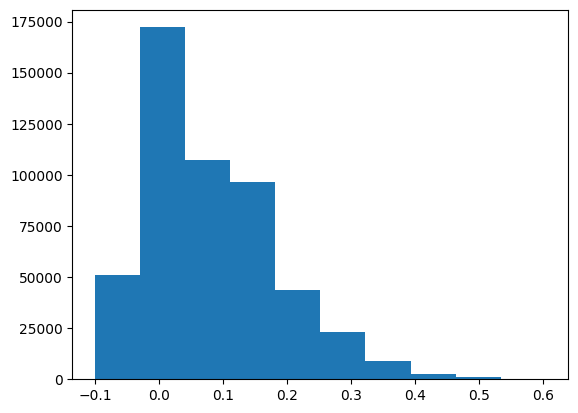

In [24]:
plt.hist(distances[:, 0])

In [21]:
np.array(distances)

(3, 589517)

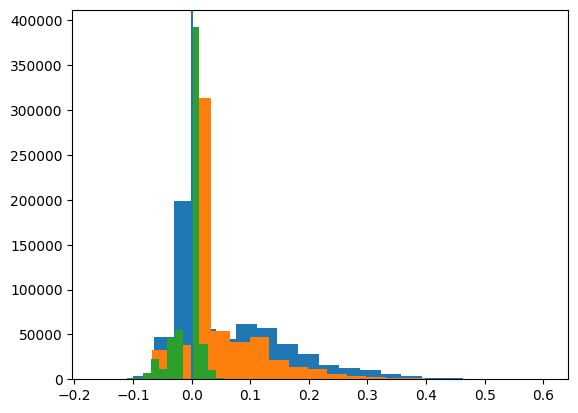

In [67]:
bins = 20
plt.hist(distances[:, 0], bins=bins)
plt.hist(distances[:, 1], bins=bins)
plt.hist(distances[:, 2], bins=bins)
plt.axvline(0.0)

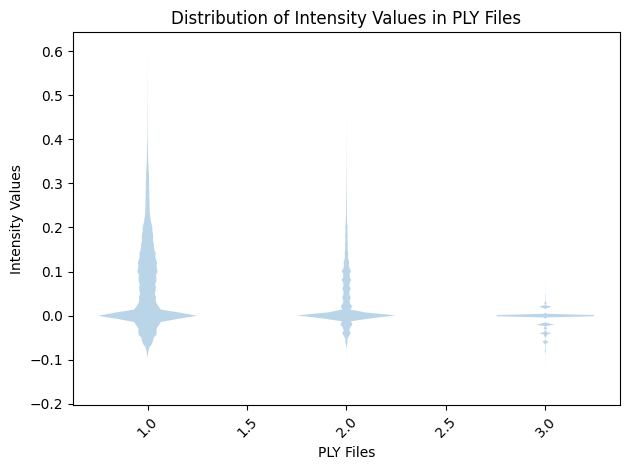

In [71]:
# Plot the box-and-whiskers plot

plt.violinplot(np.nan_to_num(distances, -1.0), showextrema=False)
plt.xticks(rotation=45)
plt.xlabel('PLY Files')
plt.ylabel('Intensity Values')
plt.title('Distribution of Intensity Values in PLY Files')
plt.tight_layout()
plt.show()

In [44]:
np.nanpercentile(distances[:,0], 25)

0.0

In [39]:
?np.iqr

Object `np.iqr` not found.


In [55]:
def boxplot_stats(data, label):
    
    
    
    q0 = np.nanpercentile(data, 0)
    q1 = np.nanpercentile(data, 25)
    med = np.nanpercentile(data, 50)
    q3 = np.nanpercentile(data, 75)
    q4 = np.nanpercentile(data, 100)
    
    iqr = q3 - q1
    
    whislo = min( data[data > q1 - 1.5*iqr])
    whishi = max( data[data < q3 + 1.5*iqr])
    
    fliers = [d for d in data if not whislo <= d <= whishi]
    
    return {
        "label": label,
        "whislo": whislo,
        "q1": q1,
        "med": med,
        "q3": q3,
        "whishi": whishi,
        "fliers": fliers,
    }

In [56]:
labels=["baseline", "heuristic", "certified"]
boxplot_data = [boxplot_stats(distances[:, i], labels[i]) for i in range(3)]

In [57]:
boxplot_data

[{'label': 'baseline',
  'whislo': -0.1,
  'q1': 0.0,
  'med': 0.04,
  'q3': 0.128062,
  'whishi': 0.32,
  'fliers': [0.34,
   0.34,
   0.34,
   0.36,
   0.36,
   0.34,
   0.34,
   0.34,
   0.36,
   0.36,
   0.360555,
   0.360555,
   0.34,
   0.320624,
   0.34,
   0.34,
   0.36,
   0.36,
   0.380526,
   0.380526,
   0.360555,
   0.360555,
   0.340588,
   0.320624,
   0.321248,
   0.34,
   0.34,
   0.36,
   0.36,
   0.38,
   0.4005,
   0.4005,
   0.380526,
   0.360555,
   0.360555,
   0.341174,
   0.32311,
   0.32311,
   0.34,
   0.34,
   0.36,
   0.36,
   0.38,
   0.4005,
   0.4005,
   0.4005,
   0.4005,
   0.380526,
   0.360555,
   0.361109,
   0.342929,
   0.32311,
   0.324962,
   0.34,
   0.34,
   0.36,
   0.38,
   0.38,
   0.4005,
   0.4005,
   0.420476,
   0.420476,
   0.4005,
   0.4005,
   0.380526,
   0.361109,
   0.362767,
   0.342929,
   0.324962,
   0.328024,
   0.34,
   0.34,
   0.36,
   0.38,
   0.38,
   0.4,
   0.4005,
   0.420476,
   0.440454,
   0.440454,
   0.420476,
  

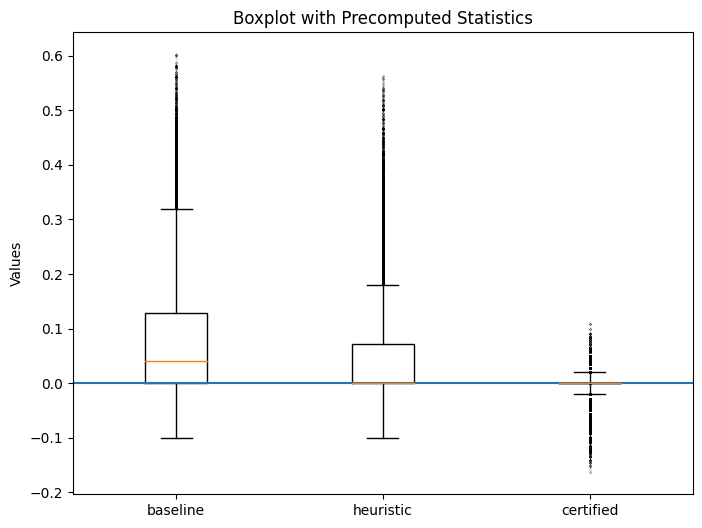

In [75]:

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bxp(boxplot_data, showfliers=True, flierprops={"markersize": 0.05})
ax.set_title("Boxplot with Precomputed Statistics")
ax.set_ylabel("Values")
plt.axhline(0.0)
plt.show()